# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rizki Laksana Putra
- Email: riskilaksanaputra007@gmail.com
- ID Dicoding: l4ksana

## Menentukan Pertanyaan Bisnis
- Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan tahun?
- Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan kategori pengguna?
- Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan musim?
- Apakah ada perbedaan yang signifikan dalam penggunaan bike sharing pada hari kerja dan hari libur?
- Musim apa dengan jumlah pengguna bike share tertinggi?
- Bagaimana pengaruh cuaca dengan jumlah pengguna bike share?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

#### Gathering Data

In [2]:
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_day.duplicated().sum()

0

In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df_hour.duplicated().sum()

0

In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Column instant bisa dihapus karna record index dapat ditampilkan dengan library pandas
- Column dteday memiliki tipe data object (Harus diganti ke tipe data datetime)
- Record dan tipe data column season, yr, mnth, hr, holiday, weekday, workingday, weathersit lebih baik diganti menjadi tipe data categorical supaya mudah dibaca

#### Cleaning Data

In [12]:
df_hour.drop('instant', axis = 1, inplace = True)
df_day.drop('instant', axis = 1, inplace = True)

In [13]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
#Mengganti nama columns
rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'hum': 'humidity', 'cnt': 'count'}

df_hour.rename(columns=rename, inplace=True)
df_day.rename(columns=rename, inplace=True)

In [15]:
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#Mengganti tipe data
categorical = ['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday']

for df in [df_day, df_hour]:
    df['date'] = pd.to_datetime(df['date'])
    df[categorical] = df[categorical].astype('category')
    
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    int64         
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1

In [17]:
#Labelling
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
for df in [df_day, df_hour]:
    df['season'].replace(season_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
#Mengganti Value
year_mapping = {0: 2011, 1: 2012}
for df in [df_day, df_hour]:
    df['year'].replace(year_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
#Labelling
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
for df in [df_day, df_hour]:
    df['month'].replace(month_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
#Labelling
holiday_mapping = {0: 'No', 1: 'Yes'}
for df in[df_day, df_hour]:
    df['holiday'].replace(holiday_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,No,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
#Labelling
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
for df in [df_day, df_hour]:
    df['weekday'].replace(weekday_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,No,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
#Labelling
workingday_mapping = {0: 'No', 1: 'Yes'}
for df in[df_day, df_hour]:
    df['workingday'].replace(workingday_mapping, inplace = True)
    
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,No,Saturday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
#Labelling
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
for df in [df_day, df_hour]:
    df['weathersit'].replace(weathersit_mapping, inplace = True)
    
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
#Normalized Value
scaling_columns = ['temp', 'atemp', 'humidity', 'windspeed']
scaling_factors = {'temp': 41, 'atemp': 50, 'humidity': 100, 'windspeed': 67}

for df in [df_day, df_hour]:
    df[scaling_columns] = df[scaling_columns].multiply(scaling_factors)

df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis

In [25]:
df_hour.describe(include = 'all')

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [26]:
df_hour.groupby(by = 'season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
season,,,
Winter,60622,410726,471348
Spring,203522,715067,918589
Summer,226091,835038,1061129
Fall,129782,711831,841613


In [27]:
df_hour.groupby(by = 'year').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [28]:
df_hour.groupby(by = 'month').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
month,,,
January,12042,122891,134933
February,14963,136389,151352
March,44444,184476,228920
April,60802,208292,269094
May,75285,256401,331686
June,73906,272436,346342
July,78157,266791,344948
August,72039,279155,351194
September,70323,275668,345991


In [29]:
df_hour.groupby(by = 'hour').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [30]:
df_hour.groupby(by = 'holiday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


In [31]:
df_hour.groupby(by = 'weekday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


In [32]:
df_hour.groupby(by = 'workingday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [33]:
df_hour.groupby(by = 'weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
weathersit,,,
Clear,462745,1875428,2338173
Mist,134481,661471,795952
Light Rain,22783,135548,158331
Heavy Rain,8,215,223


## Data Visualization

#### Univariate Visualization 

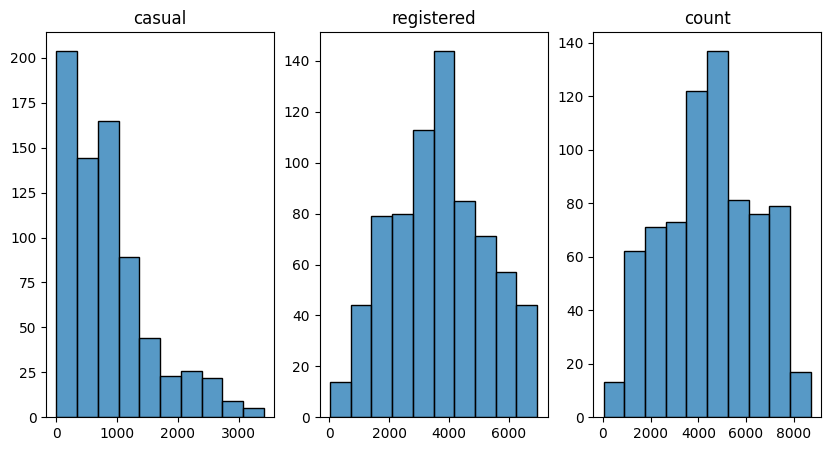

In [34]:
columns = ['casual', 'registered', 'count']

fig, axes = plt.subplots(1, 3, figsize = (10, 5))

for i, ax in enumerate(axes):
    sns.histplot(x = df_day[columns[i]], ax = ax, bins=10)
    ax.set(title=columns[i], xlabel = "", ylabel = "")

plt.show()

- Data casual menunjukan distribusi data yang sebagian besar populasi datanya terkonsentrasi pada bagian kiri
- Data Registered & Count memiliki distribusi data yang normal

#### Bivariate Visualization

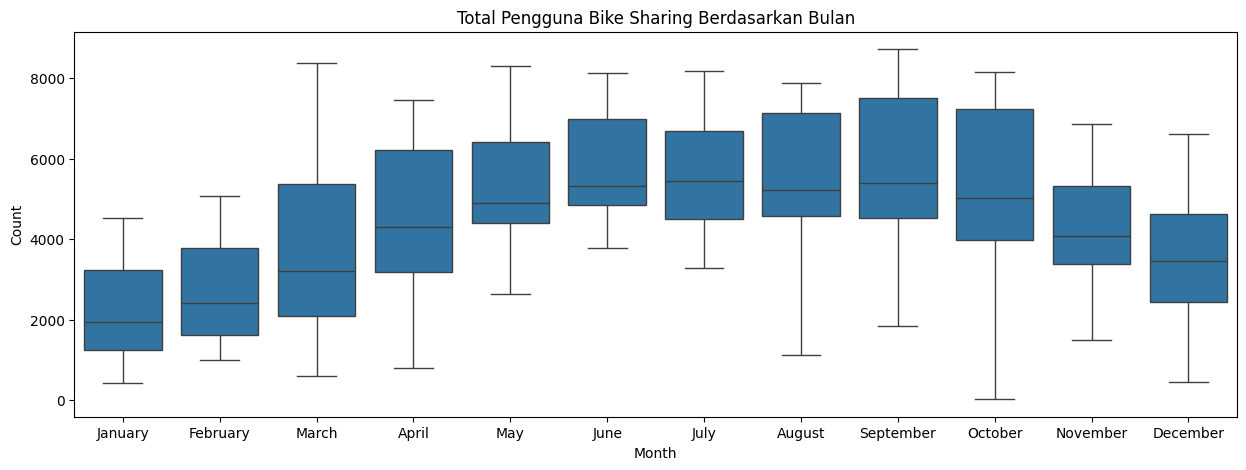

In [35]:
plt.figure(figsize = (15, 5))

sns.boxplot(x = 'month', y = 'count', data = df_day)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Pengguna Bike Sharing Berdasarkan Bulan')
plt.show()

- Puncak Pengguna Bike Sharing Terdapat Pada Bulan September

#### Explanatory Analysis

##### Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan tahun?

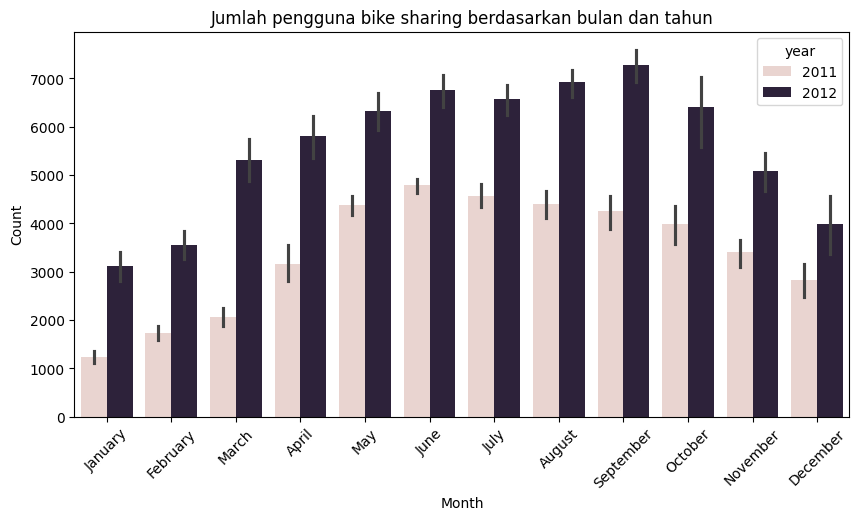

In [36]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'month', y = 'count', data = df_day, hue = 'year')
plt.title('Jumlah pengguna bike sharing berdasarkan bulan dan tahun')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

- Pada tahun 2011, bulan Juni mencatat jumlah pengguna bike sharing tertinggi, sementara pada tahun 2012, penggunaan tertinggi terjadi pada bulan September.

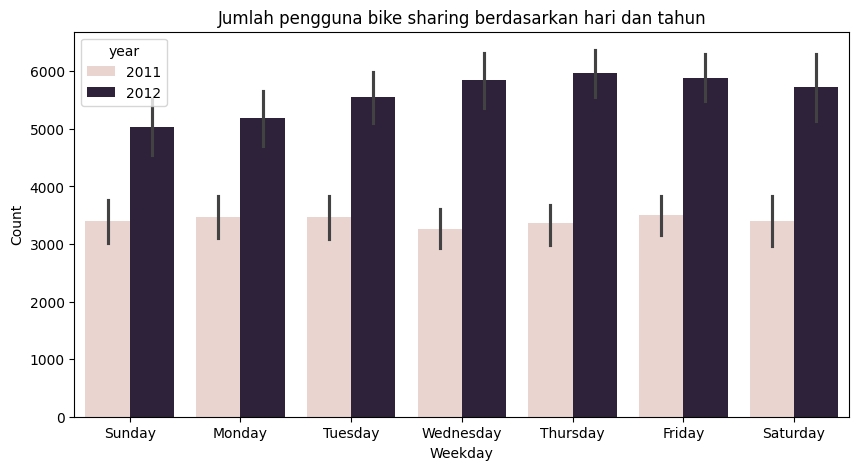

In [37]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weekday', y = 'count', data = df_day, hue = 'year')
plt.title('Jumlah pengguna bike sharing berdasarkan hari dan tahun')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

- Tahun 2012 menunjukkan bahwa hari Kamis menjadi hari dengan jumlah pengguna bike sharing tertinggi, sementara pada tahun 2011, penggunaan bike sharing pada hari Senin, Selasa, dan Jumat cukup seimbang, dengan jumlah yang kurang lebih sama.

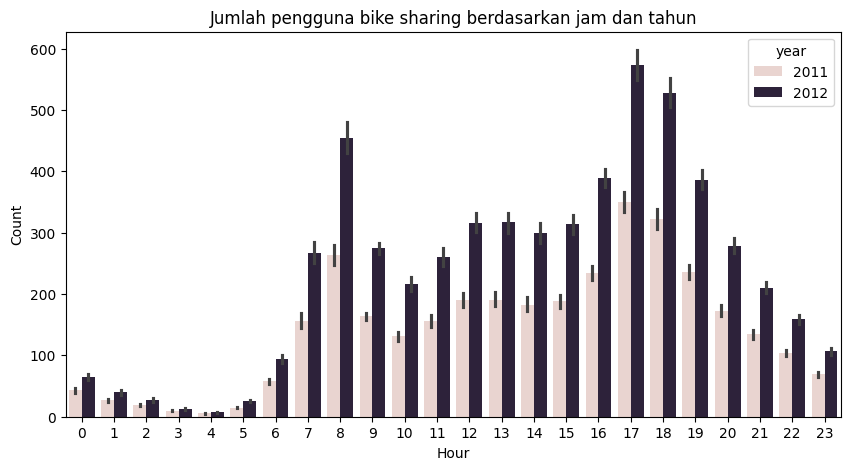

In [38]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'hour', y = 'count', data = df_hour, hue = 'year')
plt.title('Jumlah pengguna bike sharing berdasarkan jam dan tahun')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

- Pada tahun 2011 dan 2012, puncak penggunaan bike sharing terjadi pada jam 17:00.

##### Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan kategori pengguna?

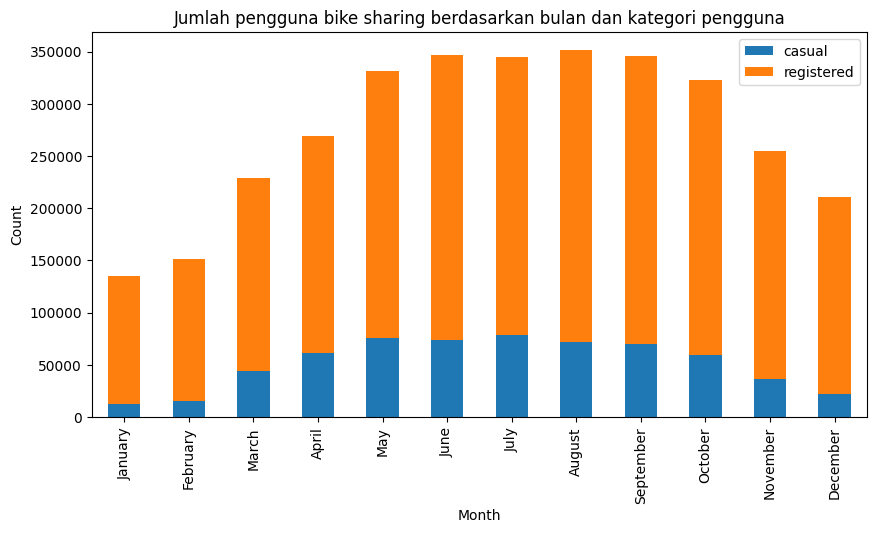

In [39]:
monthly = df_day.groupby(by = 'month').agg({
    'casual': 'sum',
    'registered': 'sum',
})

monthly.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Jumlah pengguna bike sharing berdasarkan bulan dan kategori pengguna')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

- Mayoritas pengguna biasa aktif terjadi pada bulan Juli, sementara pengguna terdaftar cenderung lebih banyak pada bulan Agustus.

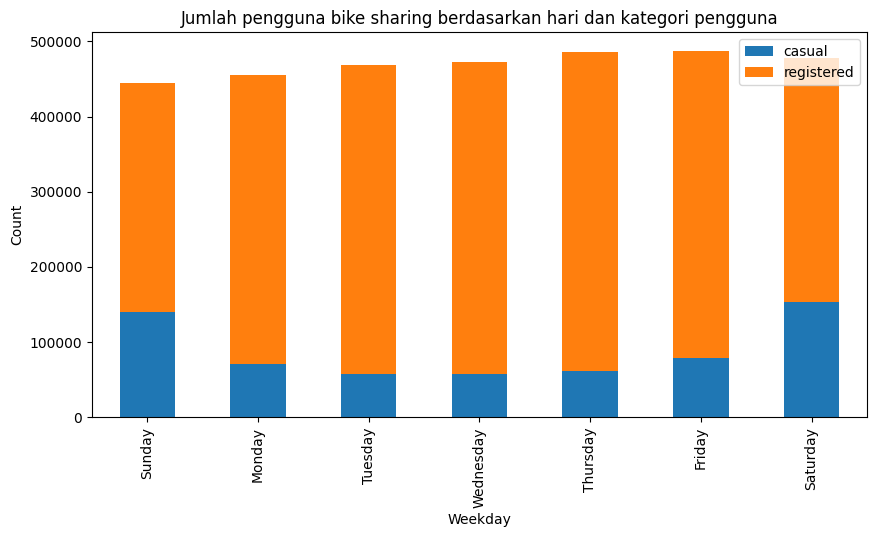

In [40]:
daily = df_day.groupby(by = 'weekday').agg({
    'casual': 'sum',
    'registered': 'sum',
})

daily.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Jumlah pengguna bike sharing berdasarkan hari dan kategori pengguna')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

- Banyak pengguna biasa aktif pada akhir pekan, khususnya pada hari Sabtu dan Minggu, sementara pengguna terdaftar lebih banyak pada hari Jumat.

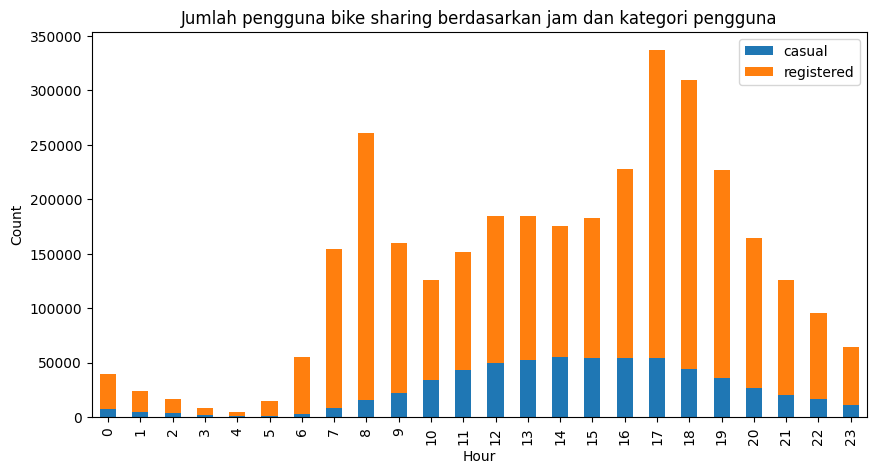

In [41]:
hourly = df_hour.groupby(by = 'hour').agg({
    'casual': 'sum',
    'registered': 'sum',
})

hourly.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Jumlah pengguna bike sharing berdasarkan jam dan kategori pengguna')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

- Waktu yang paling banyak digunakan oleh pengguna biasa adalah antara pukul 14:00 hingga 17:00.
- Waktu yang paling banyak digunakan oleh pengguna terdaftar adalah pukul 17:00

##### Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan musim?

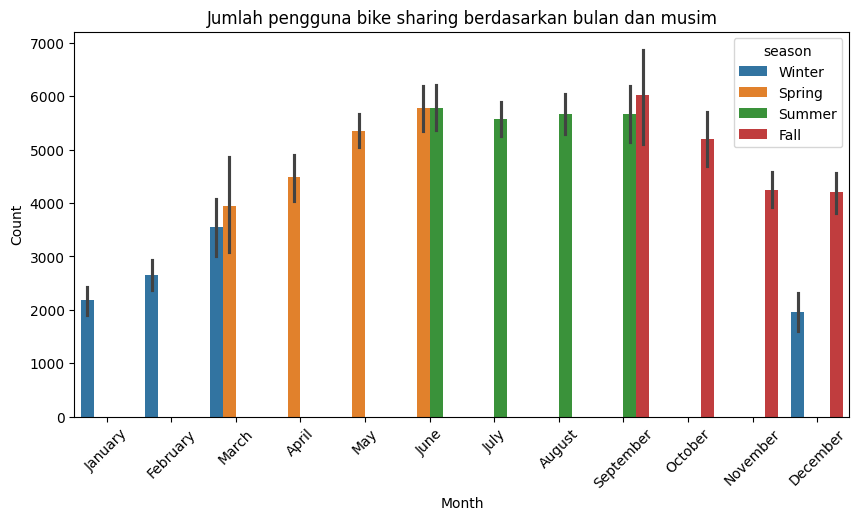

In [42]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'month', y = 'count', data = df_day, hue = 'season')
plt.title('Jumlah pengguna bike sharing berdasarkan bulan dan musim')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

- Musim panas secara konsisten menunjukkan jumlah pengguna bike sharing terbanyak dari bulan Juni hingga September.

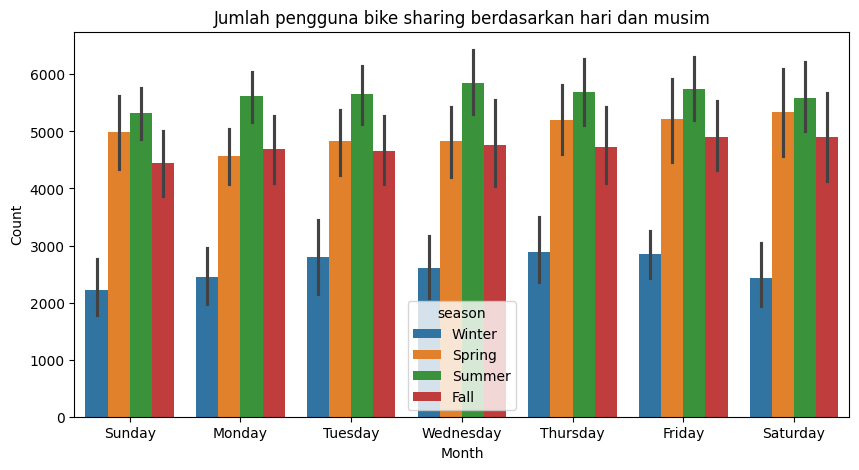

In [43]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weekday', y = 'count', data = df_day, hue = 'season')
plt.title('Jumlah pengguna bike sharing berdasarkan hari dan musim')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- Pada musim panas, penggunaan bike sharing mencapai puncaknya dari hari Senin hingga Minggu.

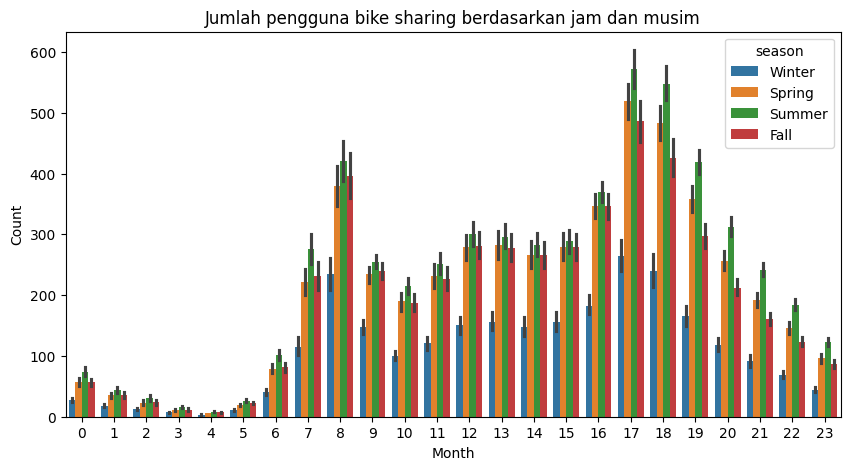

In [44]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'hour', y = 'count', data = df_hour, hue = 'season')
plt.title('Jumlah pengguna bike sharing berdasarkan jam dan musim')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- Pada musim panas, pukul 17:00 sore menjadi jam dengan jumlah pengguna bike sharing terbanyak.

##### Apakah ada perbedaan yang signifikan dalam penggunaan bike sharing pada hari kerja dan hari libur?

Text(0, 0.5, 'Count')

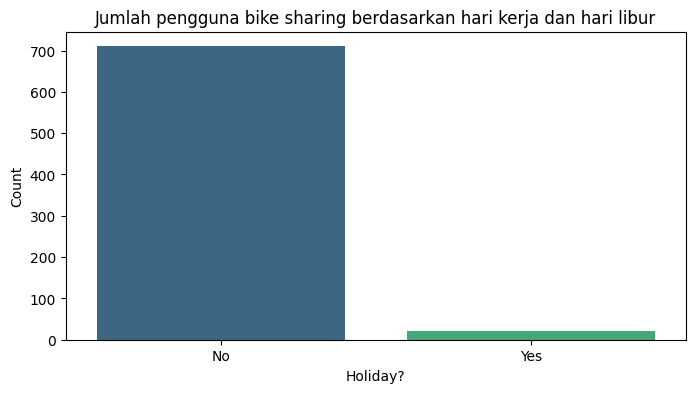

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'holiday', data = df_day, palette='viridis')
plt.title('Jumlah pengguna bike sharing berdasarkan hari kerja dan hari libur')
plt.xlabel('Holiday?')
plt.ylabel('Count')

- Chart tersebut menunjukan bahwa pengguna bike share terbanyak adalah pada hari kerja.

##### Musim apa dengan jumlah pengguna bike share tertinggi?

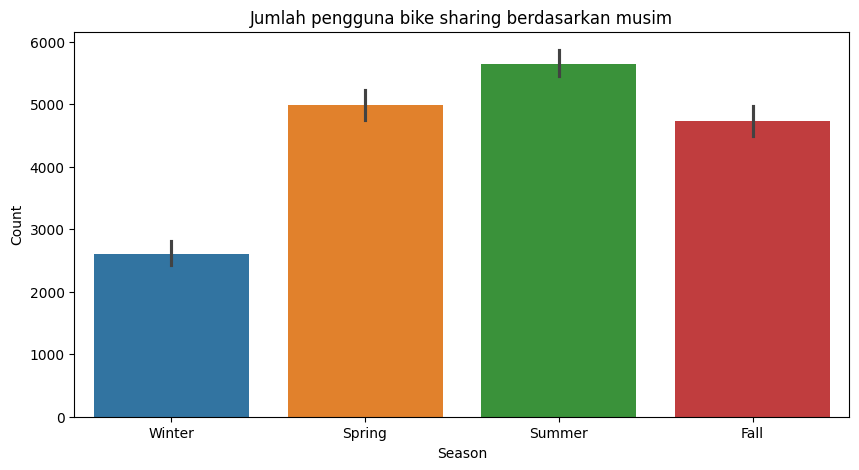

In [46]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'season', y = 'count', data = df_day, hue = 'season')
plt.title('Jumlah pengguna bike sharing berdasarkan musim')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

- Musim panas menunjukan pengguna bike share terbanyak

##### Bagaimana pengaruh cuaca dengan jumlah pengguna bike share?

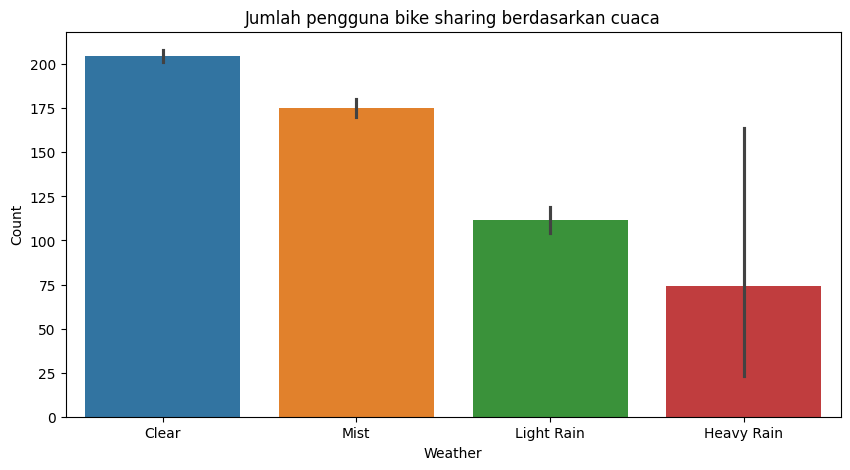

In [47]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weathersit', y = 'count', data = df_hour, hue = 'weathersit')
plt.title('Jumlah pengguna bike sharing berdasarkan cuaca')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

- Cuaca cerah menunjukan jumlah pengguna bike share tertinggi.

## Kesimpulan
Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan tahun?
- Pada tahun 2011, bulan Juni mencatat jumlah pengguna bike sharing tertinggi, sementara pada tahun 2012, penggunaan tertinggi terjadi pada bulan September.
- Pada Tahun 2012 menunjukkan bahwa hari Kamis menjadi hari dengan jumlah pengguna bike sharing tertinggi, sementara pada tahun 2011, penggunaan bike sharing pada hari Senin, Selasa, dan Jumat cukup seimbang, dengan jumlah yang kurang lebih sama.
- Pada tahun 2011 dan 2012, puncak penggunaan bike sharing terjadi pada jam 17:00.

Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan kategori pengguna?
- Mayoritas pengguna biasa aktif terjadi pada bulan Juli, sementara pengguna terdaftar cenderung lebih banyak pada bulan Agustus.
- Banyak pengguna biasa aktif pada akhir pekan, khususnya pada hari Sabtu dan Minggu, sementara pengguna terdaftar lebih banyak pada hari Jumat.
- Waktu yang paling banyak digunakan oleh pengguna biasa adalah antara pukul 14:00 hingga 17:00. Sedangkan, Waktu yang paling banyak digunakan oleh pengguna terdaftar adalah pukul 17:00

Apa saja bulan, hari, dan jam tersibuk untuk bike sharing berdasarkan musim?
- Musim panas secara konsisten menunjukkan jumlah pengguna bike sharing terbanyak dari bulan Juni hingga September.
- Pada musim panas, penggunaan bike sharing mencapai puncaknya dari hari Senin hingga Minggu.
- Pada musim panas, pukul 17:00 sore menjadi jam dengan jumlah pengguna bike sharing terbanyak.

Apakah ada perbedaan yang signifikan dalam penyewaan sepeda pada hari kerja dan hari libur?
- terdapat perbedaan yang signifikan tentang penggunaan bike share pada hari kerja dengan hari libur.

Musim apa dengan jumlah pengguna bike share tertinggi?
- Musim panas menjadi musim dengan pengguna bike share terbanyak.

Bagaimana pengaruh cuaca dengan jumlah pengguna bike share?
- Cuaca mempengaruhi penggunaan bike share dimana cuaca cerah menunjukan penggunaan bike share yang tinggi sedangkan cuaca hujan lebat menunjukan penggunaan bike share yang rendah
